In [1]:
# Step 1: Upload CSV file from local system
from google.colab import files
uploaded = files.upload()


Saving Iris.csv to Iris.csv


 Dataset Loaded:

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory u

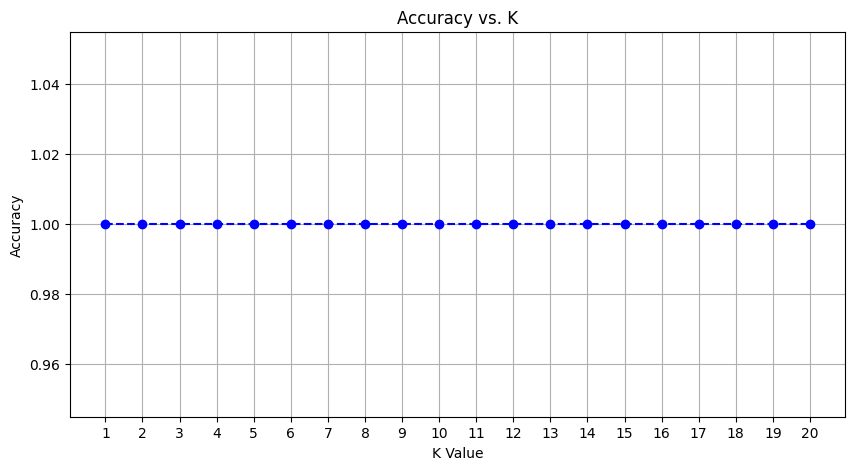

 Best K: 1

 Final Accuracy: 1.0

 Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

 Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [4]:
#  Step 2: Load dataset
import pandas as pd
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)
print(" Dataset Loaded:\n")
print(df.head())

#  Step 3: Explore dataset
print("\n Dataset Info:")
print(df.info())
print("\n Summary Stats:")
print(df.describe())

#  Replace 'species' with your target column name if different
target_column = 'Species'

#  Step 4: Split features and target
X = df.drop(target_column, axis=1)
y = df[target_column]

#  Step 5: Encode target labels if needed
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

#  Step 6: Normalize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#  Step 7: Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

#  Step 8: Try different K values
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_range = range(1, 21)
accuracies = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

#  Step 9: Plot Accuracy vs. K
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(k_range, accuracies, marker='o', linestyle='--', color='b')
plt.title('Accuracy vs. K')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(k_range)
plt.show()

#  Step 10: Train final model using best K
best_k = accuracies.index(max(accuracies)) + 1
print(f" Best K: {best_k}")

final_model = KNeighborsClassifier(n_neighbors=best_k)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

#  Step 11: Evaluate final model
from sklearn.metrics import confusion_matrix, classification_report

print("\n Final Accuracy:", accuracy_score(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))